In [37]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import cufflinks as cf
cf.go_offline()
# Importing Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Test Train split
from sklearn.model_selection import train_test_split
# Model Evaluation Metrices
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
data = pd.read_csv('data.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


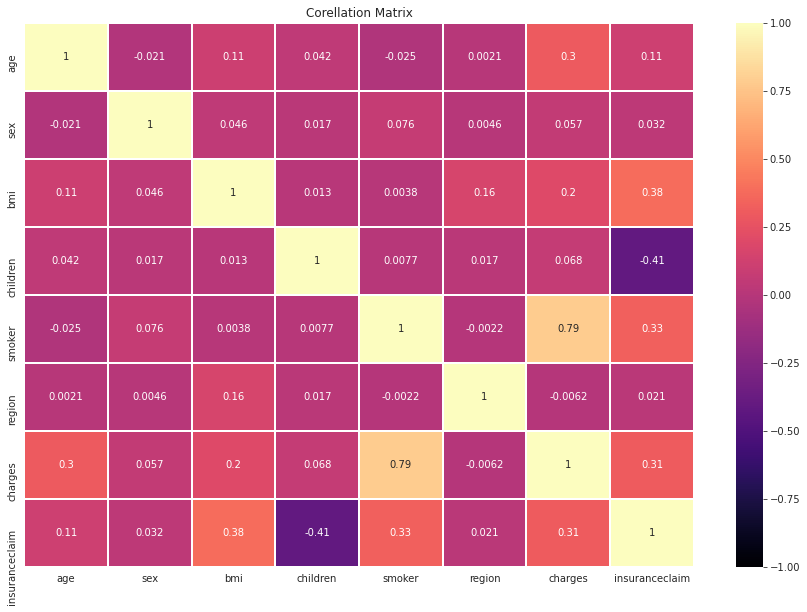

In [6]:
plt.figure(figsize=(15,10))
plt.title('Corellation Matrix')
sns.heatmap(data.corr(),vmin=-1,vmax=+1,center=0,fmt='.2g',linewidths=1, linecolor='white',cmap='magma',annot=True)

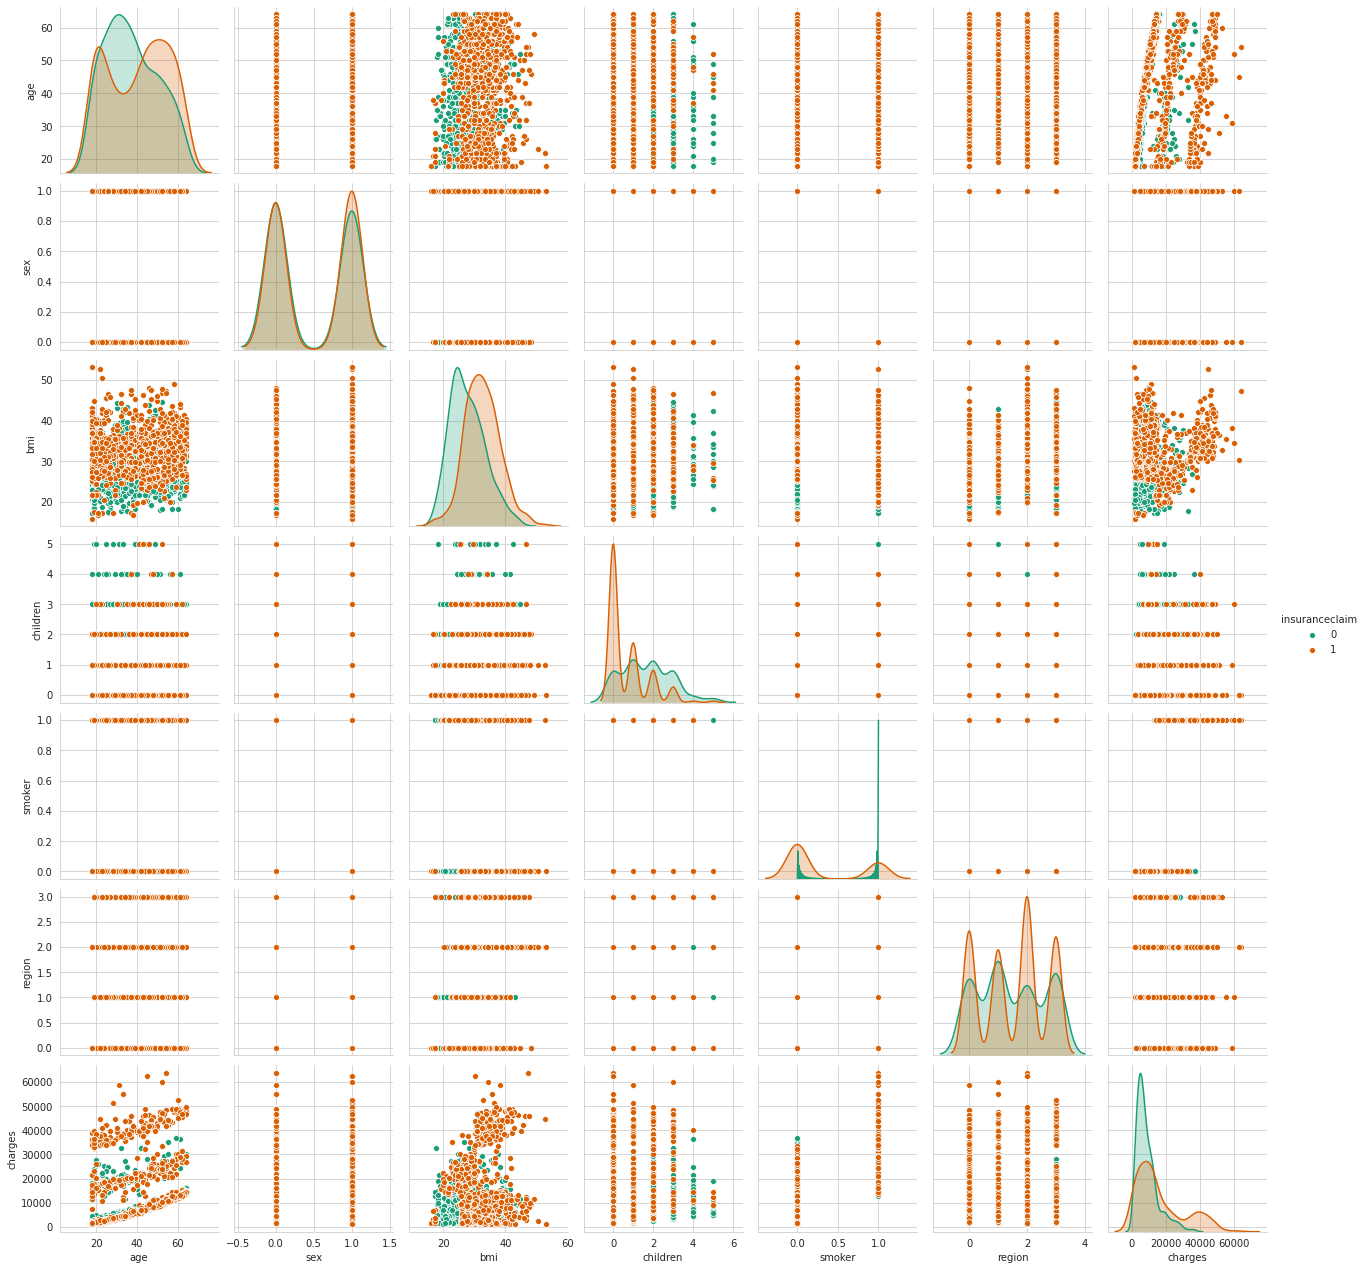

In [8]:
plt.title('Variable Interaction')
sns.pairplot(data,hue='insuranceclaim',palette='Dark2')

Text(0.5, 1.0, 'BMI Distribution')

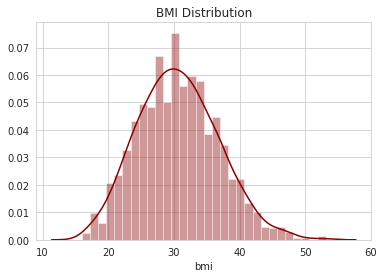

In [16]:
sns.distplot(data['bmi'],color='darkred',bins=30)
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Age Distribution')

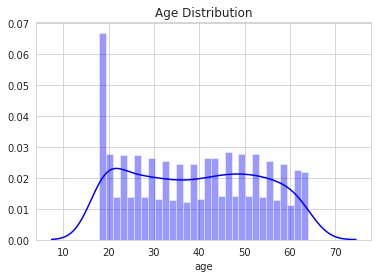

In [15]:
sns.distplot(data['age'],color='blue',bins=30)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Charges Distribution')

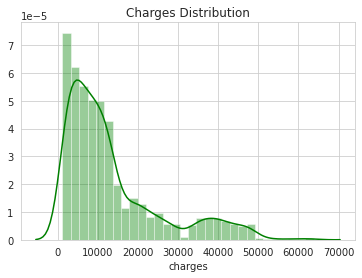

In [21]:
sns.distplot(data['charges'],color='green',bins=30)
plt.title('Charges Distribution')

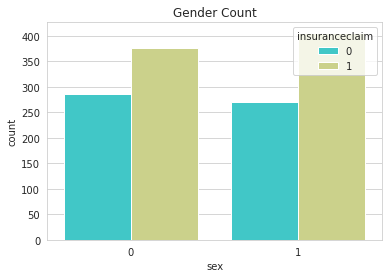

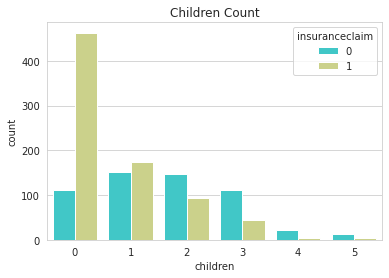

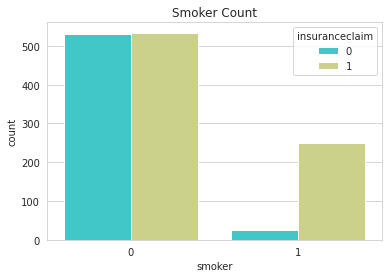

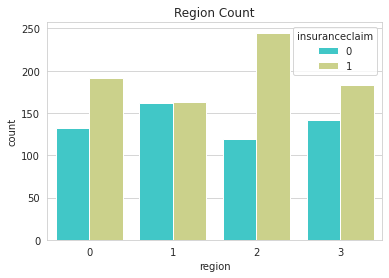

In [18]:
# Finding counts of various categories against claim
sns.countplot(x='sex',hue='insuranceclaim',data=data,palette='rainbow')
plt.title('Gender Count')
plt.show()
print('\n')
sns.countplot(x='children',hue='insuranceclaim',data=data,palette='rainbow')
plt.title('Children Count')
plt.show()
print('\n')
sns.countplot(x='smoker',hue='insuranceclaim',data=data,palette='rainbow')
plt.title('Smoker Count')
plt.show()
print('\n')
sns.countplot(x='region',hue='insuranceclaim',data=data,palette='rainbow')
plt.title('Region Count')
plt.show()
print('\n')

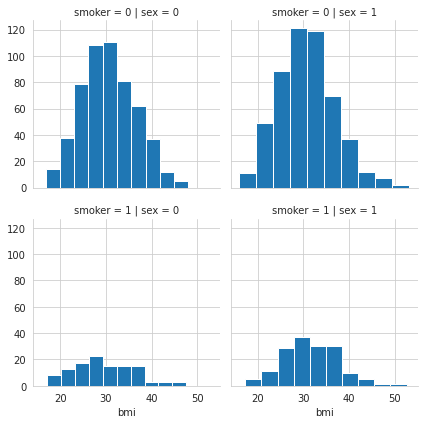

In [36]:
g = sns.FacetGrid(data, col="sex",  row="smoker")
g = g.map(plt.hist, "bmi")
#plt.title('BMI Distribution for Sex and Smoking Habits')

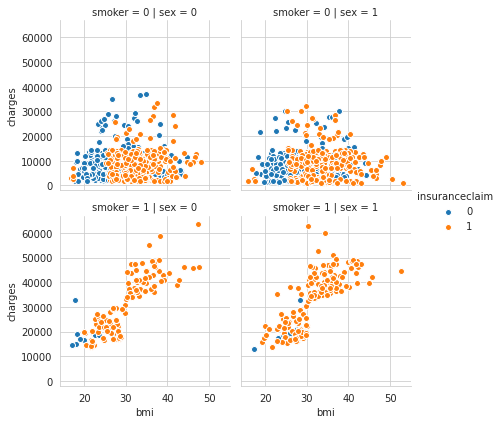

In [32]:
# Finding pattern for claims using BMI and Charges for different smoking habits and gender
g = sns.FacetGrid(data, col="sex", row="smoker", hue="insuranceclaim")
g = (g.map(plt.scatter, "bmi", "charges", edgecolor="w")
      .add_legend())

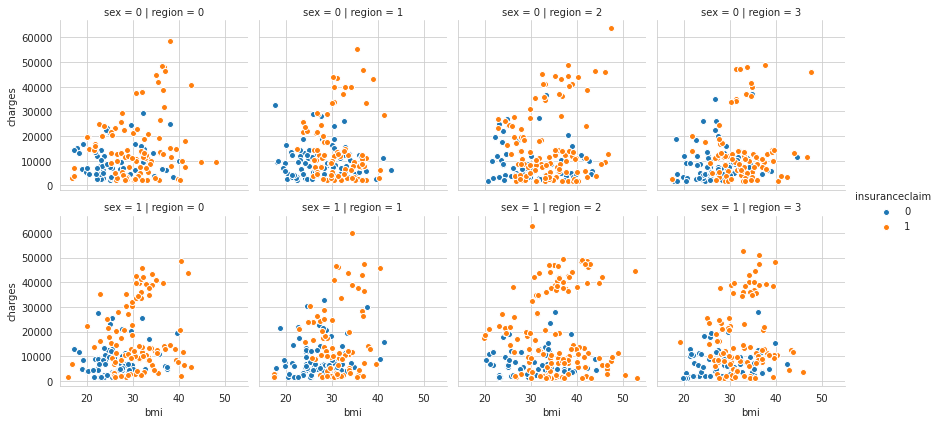

In [35]:
# Finding pattern for claims using BMI and Charges for different region and gender
g = sns.FacetGrid(data, col="region", row="sex", hue="insuranceclaim")
g = (g.map(plt.scatter, "bmi", "charges", edgecolor="w")
      .add_legend())

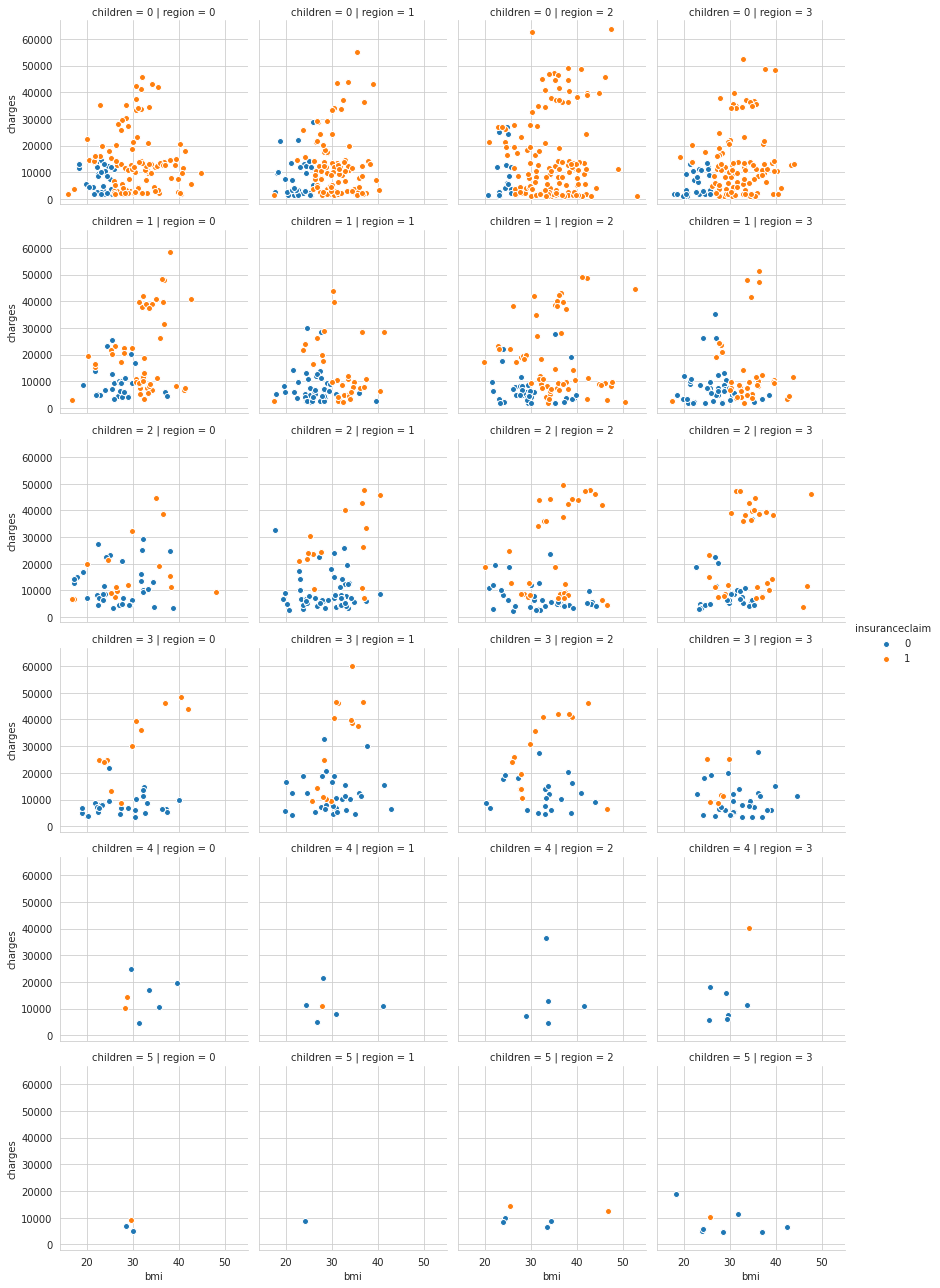

In [38]:
# Finding pattern for claims using BMI and Charges for different region and no. of children
g = sns.FacetGrid(data, col="region", row="children", hue="insuranceclaim")
g = (g.map(plt.scatter, "bmi", "charges", edgecolor="w")
      .add_legend())

In [0]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(data.drop('insuranceclaim',axis=1), 
                                                    data['insuranceclaim'], test_size=0.30, 
                                                    random_state=101)

In [41]:
# Logistic Regression

# Fitting the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

# Making Prediction
predictions_log = logmodel.predict(X_test)

# Evaluation
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions_log))
print('\n')
print('Classification Report:')
print(classification_report(y_test,predictions_log))
print('\n')
print('Train Score:', logmodel.score(X_train,y_train))
print('Test Score:', logmodel.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions_log))
print('MSE:', metrics.mean_squared_error(y_test, predictions_log))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_log)))

Confusion Matrix:
[[108  60]
 [ 28 206]]


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       168
           1       0.77      0.88      0.82       234

    accuracy                           0.78       402
   macro avg       0.78      0.76      0.77       402
weighted avg       0.78      0.78      0.78       402

Train Score: 0.7991452991452992
Test Score: 0.7810945273631841
MAE: 0.21890547263681592
MSE: 0.21890547263681592
RMSE: 0.46787335106502476


In [42]:
# Support Vector Machine

# Fitting the model
svc = SVC()
svc.fit(X_train,y_train)

# Making Prediction
predictions_svc = svc.predict(X_test)

# Evaluation
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions_svc))
print('\n')
print('Classification Report:')
print(classification_report(y_test,predictions_svc))
print('\n')
print('Train Score:', svc.score(X_train,y_train))
print('Test Score:', svc.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions_svc))
print('MSE:', metrics.mean_squared_error(y_test, predictions_svc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_svc)))

Confusion Matrix:
[[108  60]
 [116 118]]


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.64      0.55       168
           1       0.66      0.50      0.57       234

    accuracy                           0.56       402
   macro avg       0.57      0.57      0.56       402
weighted avg       0.59      0.56      0.56       402



Train Score: 0.6527777777777778
Test Score: 0.5621890547263682
MAE: 0.43781094527363185
MSE: 0.43781094527363185
RMSE: 0.6616728385491064


In [43]:
# Random Forest Classifier

# Fitting the model
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

# Making Prediction
predictions_rfc = rfc.predict(X_test)

# Evaluation
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions_rfc))
print('\n')
print('Classification Report:')
print(classification_report(y_test,predictions_rfc))
print('\n')
print('Train Score:', rfc.score(X_train,y_train))
print('Test Score:', rfc.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions_rfc))
print('MSE:', metrics.mean_squared_error(y_test, predictions_rfc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rfc)))

Confusion Matrix:
[[160   8]
 [ 10 224]]


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       168
           1       0.97      0.96      0.96       234

    accuracy                           0.96       402
   macro avg       0.95      0.95      0.95       402
weighted avg       0.96      0.96      0.96       402



Train Score: 1.0
Test Score: 0.9552238805970149
MAE: 0.04477611940298507
MSE: 0.04477611940298507
RMSE: 0.21160368475757949


In [94]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Fitting the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# Making Prediction
predictions_dtree = dtree.predict(X_test)

# Evaluation
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions_dtree))
print('\n')
print('Classification Report:')
print(classification_report(y_test,predictions_dtree))
print('\n')
print('Train Score:', dtree.score(X_train,y_train))
print('Test Score:', dtree.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions_dtree))
print('MSE:', metrics.mean_squared_error(y_test, predictions_dtree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_dtree)))

Confusion Matrix:
[[160   8]
 [  6 228]]


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       168
           1       0.97      0.97      0.97       234

    accuracy                           0.97       402
   macro avg       0.96      0.96      0.96       402
weighted avg       0.97      0.97      0.97       402



Train Score: 1.0
Test Score: 0.9651741293532339
MAE: 0.03482587064676617
MSE: 0.03482587064676617
RMSE: 0.18661690879115475


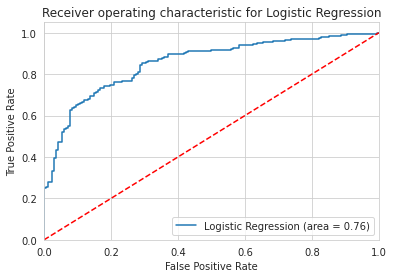

In [54]:
# Plotting ROC Curve for Logistic
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

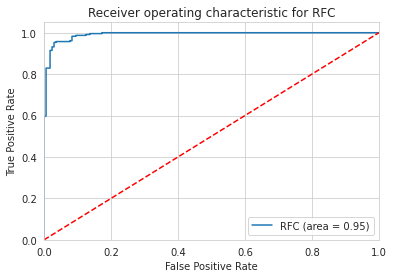

In [57]:
# We eliminate SVC as its F1 score and accuracy is least
# ROC for Random Forest Classifier
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for RFC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

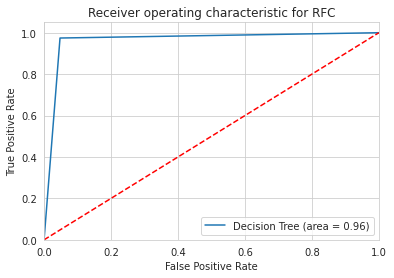

In [100]:
logit_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for RFC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
# Testing Logistic model on female of age 19 years, having BMI of 28, unmarried, occasional smoker, residing in region 3 and 
# having charges of sum Rs. 45,689
x= [[19,0,28,0,1,3,45689]]

In [71]:
logmodel.predict(x)
logmodel.predict_proba(x)

array([[0.00309294, 0.99690706]])

In [98]:
print('Probaility of Insurance Claim:', list(logmodel.predict_proba(x)[0:,1]))

Probaility of Insurance Claim: [0.9969070556747628]


In [97]:
# Testing same data on RFC
rfc.predict(x)
rfc.predict_proba(x)
print('Probaility of Insurance Claim:', list(rfc.predict_proba(x)[0:,1]))

Probaility of Insurance Claim: [0.99]


In [101]:
# Testing on Decision Tree
dtree.predict(x)
dtree.predict_proba(x)
print('Probaility of Insurance Claim:', list(dtree.predict_proba(x)[0:,1]))

Probaility of Insurance Claim: [1.0]


In [95]:
# Visvualizing Decidion Tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data.columns[1:])
features

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



['sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'insuranceclaim']

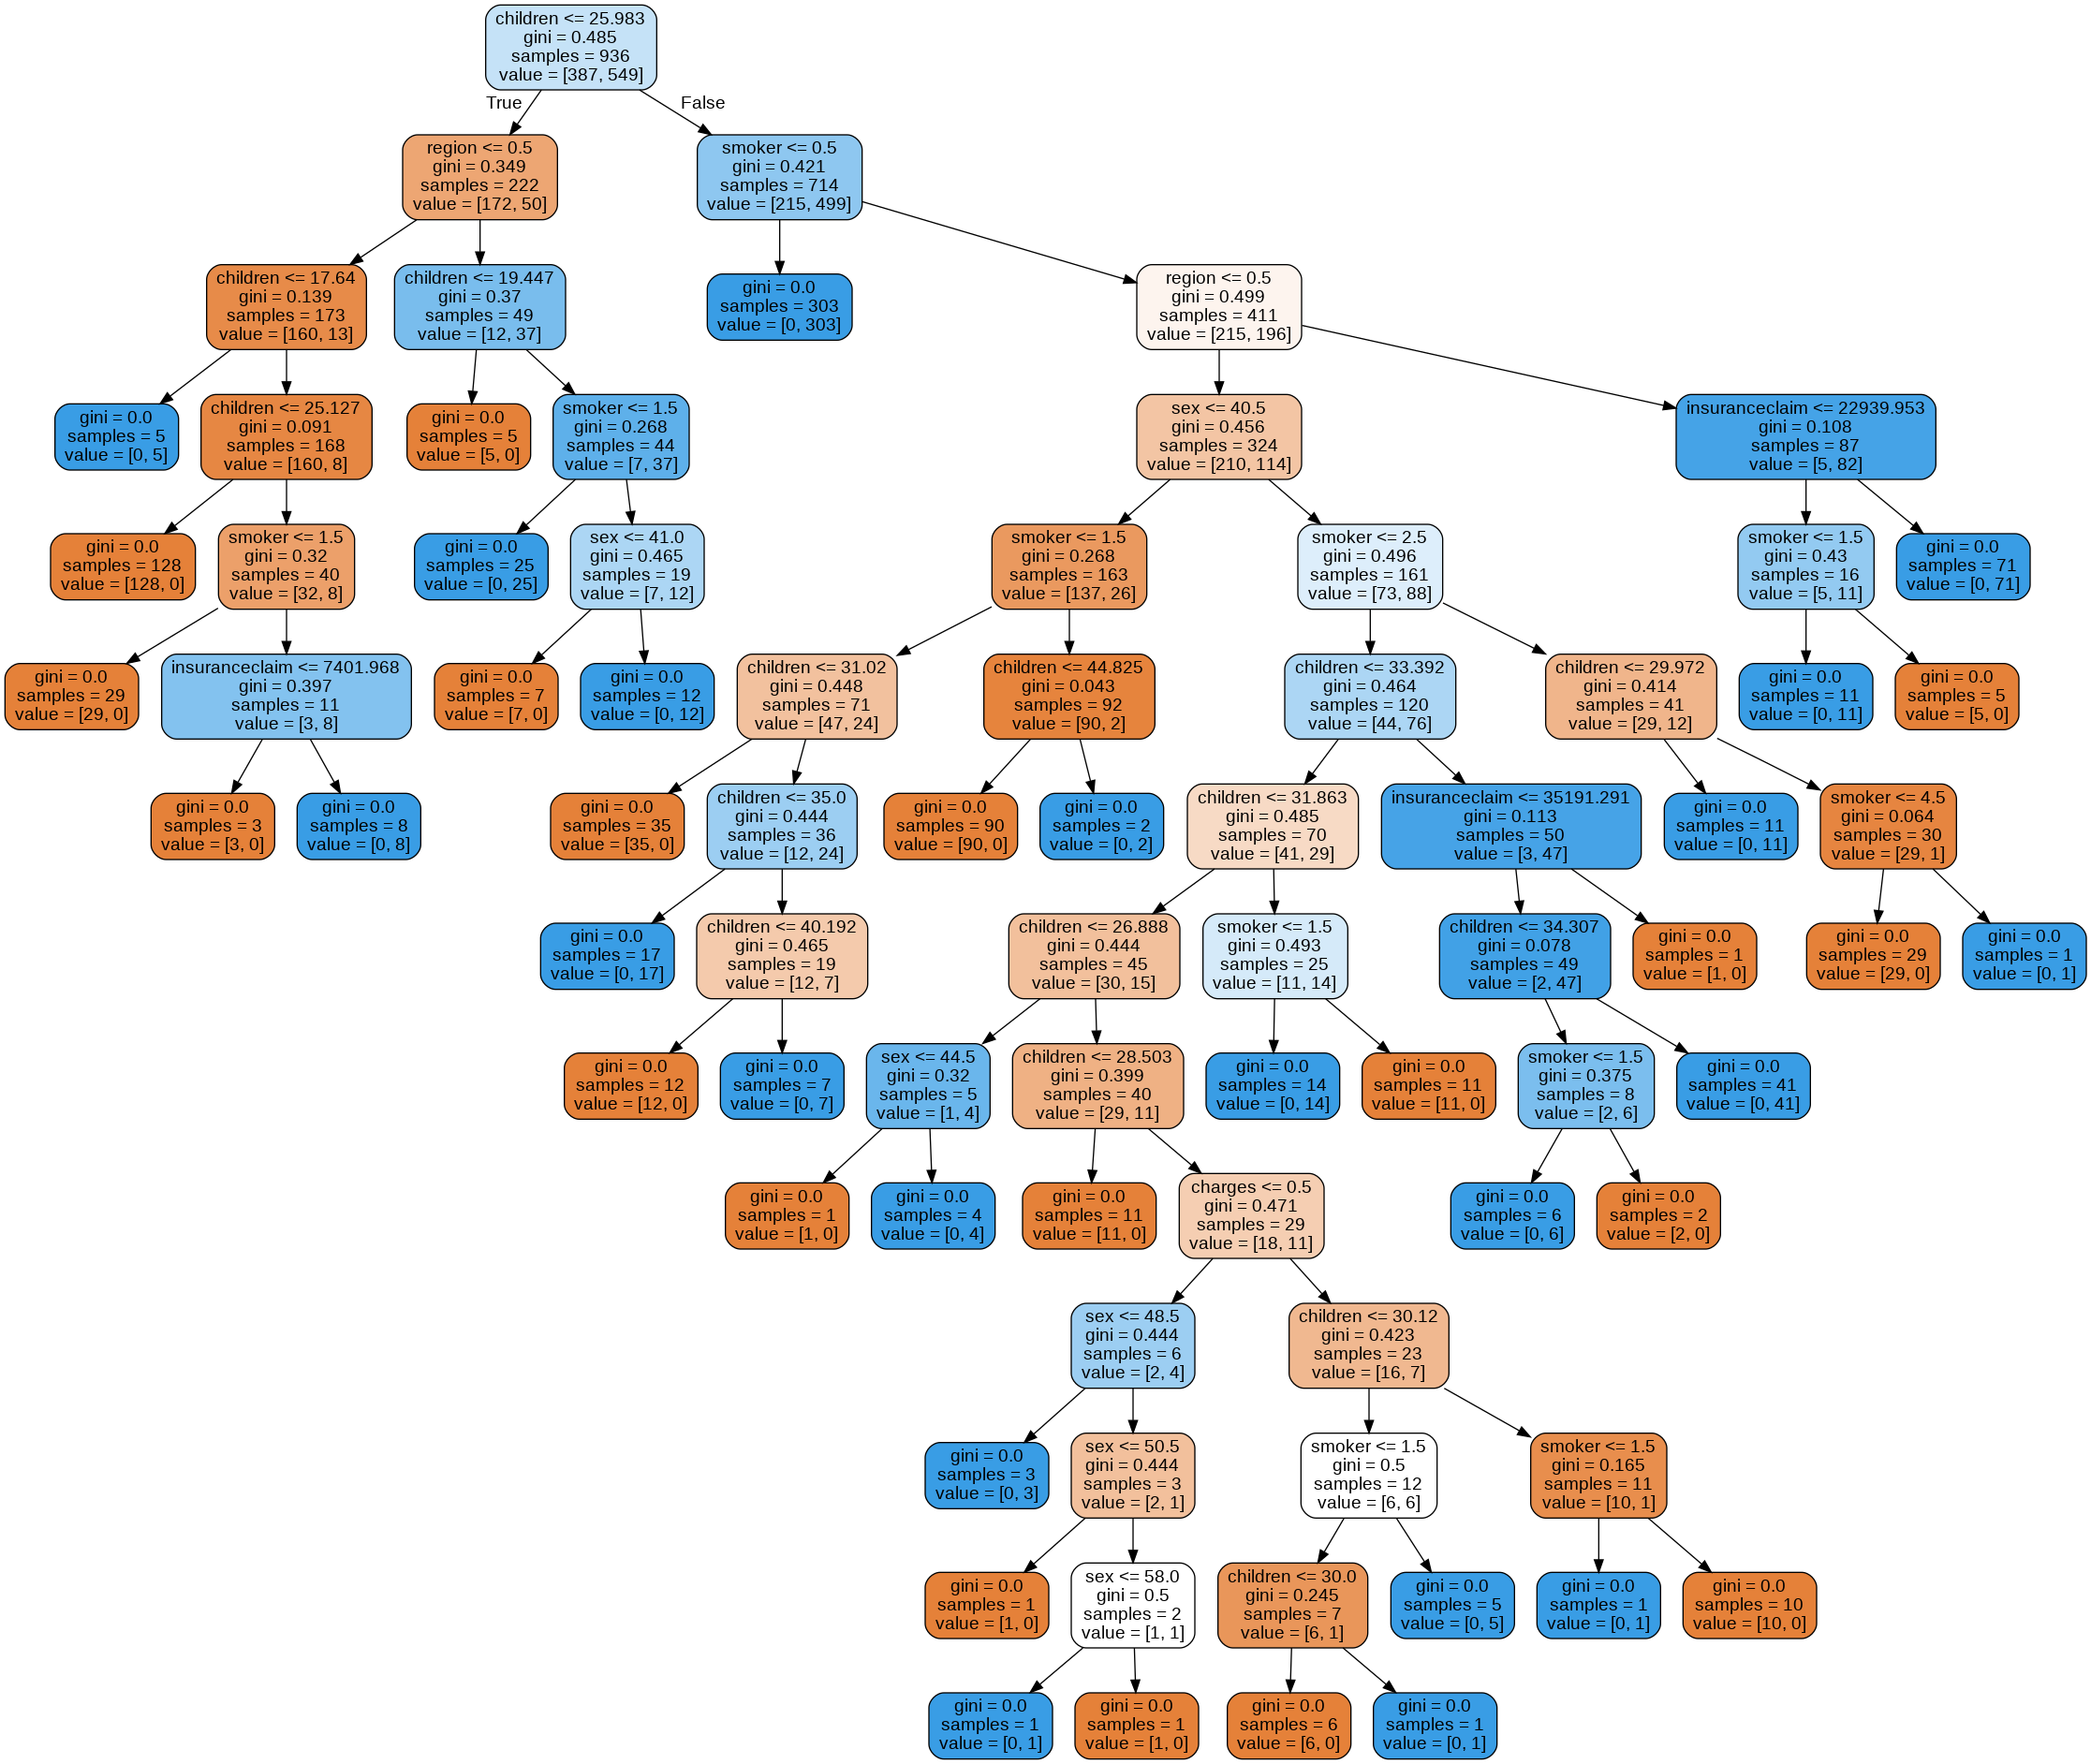

In [99]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  